# PHASE 2 PROJECT
**Presented by:** Group 4.4
***

## Dennis Mwanzia 
## Pamela Awino 
## Ian Macharia
## Samuel Igecha
## Pauline Njeri

# 1.0  Project Introduction and Overview

The aim of this project is to put into practice our newly aqcuired skills in data science to formulate and solve a real business problem. In this project, we are given a raw dataset which is the house sales prices in Northwestern County and we are supposed to formulate a real business case study and use the data to solve the business problem and provide a useful business advisory which can be used to formulate real and valuable business decisions. Unlike in phase 1, we are not given the business problem, its upon us to formulate it.

## 1.1 Data Understanding

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('seaborn')

import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import plot_partial_residuals

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from scipy.stats import pearsonr

import pickle
import json

#import folium 
#from folium import plugins
#from folium.plugins import HeatMap


from my_functions import clean_data, round_bathrooms, remove_outliers, x_coord, fit_simple_linear_reg, fit_multiple_linear_reg, calculate_rmse, fit_polynomial_reg


We have been provided with King County House Sales dataset found in 'kc_house_data.csv'. There is a description of columns dataset found in the md folder 'column_names.md'. Therefore, we examine the column descriptions to understand their meaning.

In [2]:
#Unpacking the description 
with open('data/column_names.md', 'r') as f:
    md_text = f.read()

print(md_text)

# Column Names and Descriptions for King County Data Set
* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type

In this problem, we have been given a dataset that contains the following variables;
1. id - unique identified for a house
2. dateDate - house was sold
3. pricePrice - is prediction target
4. bedroomsNumber - of Bedrooms/House
5. bathroomsNumber - of bathrooms/bedrooms
6. sqft_livingsquare - footage of the home
7. sqft_lotsquare - footage of the lot
8. floorsTotal - floors (levels) in house
9. waterfront - House which has a view to a waterfront
10. view - Has been viewed
11. condition - How good the condition is ( Overall )
12. grade - overall grade given to the housing unit, based on King County grading system
13. sqft_above - square footage of house apart from basement
14. sqft_basement - square footage of the basement
15. yr_built - Built Year
16. yr_renovated - Year when house was renovated
17. zipcode - zip
18. lat - Latitude coordinate
19. long - Longitude coordinate
20. sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

## Business Understanding

## Business Problem

The business problem is to provide guidance to Kings Wajenzi Developers, a prospective real estate developer in King County, on the most profitable types of properties to target in the current market. The guidance will include recommendations on optimal locations, features, and time of year when homeowners are most likely to purchase properties. Our objective as junior data analysts at a Real Estate Agency is to analyze house sales data in King County and leverage the insights generated to guide the developer in selecting the most profitable properties to develop and maximize their profits. With King County's population on the rise and income stabilizing after the COVID-19 pandemic, demand for new homes in the area is at an all-time high.

## 1.2 Objectives

1. Does the time of the year affect the price of an house? If yes, which seasons/Months are most profitable?
2. Does Location affect prices? If yes, which locations within King county attract highest price of houses?
3. Which features/Attributes have the highest impact on sales price of houses/properties? Which features should the developer focus on when developing their upcoming projects in King County?


## Aproach

This project follows the OCEMiN Data Science framework for data analysis
1.	Obtain/import data
2.	Clean/ Scrub data
3.	Explore data/EDA
4.	Model/Develop the predictive Model
5.	Interpret Data


# 2.0 Data Exploration

In [3]:
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [4]:
df.shape

(21597, 21)

The dataset has 21597 rows and 21 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The whole dataset is stored as pandas dataframe. We have three types of datatypes for columns which are integers, floats and objects. Since we are interested in running a linear regression model, we would like all the columns, to be numeric datatypes. However, some columns like date, waterfront, view, condition, grade, sqft_basement are objects and most likely categorical variables and will need to be transformed to dummy variables using one-hote encoding function of python. Intergers will also need to be examined to determine if they are binary variables or numeric data types. 
Its very important to note that sqft_basement should be of value type float so we will need to investigate that column.
Date column need to be transformed to date and year columns.

## 3.0 Data Cleaning

In [6]:
#Checking for how many missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Waterfront, view and year renovated have missing values. Lets check the percentage of missing values in the dataset.b

In [7]:
# Get percentage of missing values
for col in ['waterfront', 'view', 'yr_renovated']:
    percent_missing = df[col].isnull().sum() * 100 / len(df)
    print(f"{col}:{round(percent_missing,2)}")

waterfront:11.0
view:0.29
yr_renovated:17.79


Waterfront, view and year renovated have 11.0%, 0.29%, and 17.79% respectively of missing data. Waterfront, and view are objects and therefore, we can replace the missing values with the mode while yr_renovated is a integer and hence we will replace the missing values with zeros. This is because we assumed that for any missing values, there was no renovation that was undertaken for that specific unit. 

In [8]:
print (df['waterfront'].mode())
print (df['view'].mode())

0    NO
dtype: object
0    NONE
dtype: object


In [9]:
# Investigate sqft_basement column
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: sqft_basement, Length: 304, dtype: int64

In [10]:
# Get summary statistics for sqft_basement
df['sqft_basement'].describe()

count     21597
unique      304
top         0.0
freq      12826
Name: sqft_basement, dtype: object

There is a significant number of entries with ? as value for sqft_basement. Moreover, more than half of entries have a value of 0 indicating there is no basement. We will replace the placeholder with 0. 

In [11]:
df=clean_data(df)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
0,221900.0,3,1.00,1180,5650,1.0,0,0,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,10,2014,60,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,64,0
2,180000.0,2,1.00,770,10000,1.0,0,0,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,12,2014,50,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0,0,0,0,...,0.0,98103,47.6993,-122.346,1530,1509,5,2014,6,0
21593,400000.0,4,2.50,2310,5813,2.0,0,0,0,0,...,0.0,98146,47.5107,-122.362,1830,7200,2,2015,1,1
21594,402101.0,2,0.75,1020,1350,2.0,0,0,0,0,...,0.0,98144,47.5944,-122.299,1020,2007,6,2014,6,0
21595,400000.0,3,2.50,1600,2388,2.0,0,0,0,0,...,0.0,98027,47.5345,-122.069,1410,1287,1,2015,11,0


In [12]:
# check if all missing values have been resolved
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
month_sold       0
year_sold        0
age              0
renovated        0
dtype: int64

We nolonger have any missing values, therefore we proceed to check for duplicates.

In [13]:
#checking for duplicates
#duplicates = df[df.duplicated()]
df.duplicated().sum()
#print(len(duplicates))

2

We dont have any duplicates and therefore we can proceed to investigate the integer and object data types and perform the necessary transformations for our multiple regression model.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21597 non-null  float64 
 1   bedrooms       21597 non-null  int64   
 2   bathrooms      21597 non-null  float64 
 3   sqft_living    21597 non-null  int64   
 4   sqft_lot       21597 non-null  int64   
 5   floors         21597 non-null  float64 
 6   waterfront     21597 non-null  category
 7   view           21597 non-null  category
 8   condition      21597 non-null  category
 9   grade          21597 non-null  category
 10  sqft_above     21597 non-null  int64   
 11  sqft_basement  21597 non-null  float64 
 12  yr_renovated   21597 non-null  float64 
 13  zipcode        21597 non-null  category
 14  lat            21597 non-null  float64 
 15  long           21597 non-null  float64 
 16  sqft_living15  21597 non-null  int64   
 17  sqft_lot15     21597 non-null  

Bathrooms appear as float and we would expected bathrooms to be integers, so we will investigate the bathrooms column. 

In [15]:
# Summary statistics for bathroom variable
df['bathrooms'].describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [16]:
# Get unique values
df['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 1.25, 5.25, 6.  , 0.5 , 5.5 ,
       6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [17]:
# Apply function to df
df = round_bathrooms(df)

In [18]:
# check changes have been applied
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month_sold,year_sold,age,renovated
0,221900.0,3,1,1180,5650,1.0,0,0,0,0,...,0.0,98178,47.5112,-122.257,1340,5650,10,2014,60,0
1,538000.0,3,2,2570,7242,2.0,0,0,0,0,...,1991.0,98125,47.7210,-122.319,1690,7639,12,2014,64,0
2,180000.0,2,1,770,10000,1.0,0,0,0,0,...,0.0,98028,47.7379,-122.233,2720,8062,2,2015,82,0
3,604000.0,4,3,1960,5000,1.0,0,0,0,0,...,0.0,98136,47.5208,-122.393,1360,5000,12,2014,50,0
4,510000.0,3,2,1680,8080,1.0,0,0,0,0,...,0.0,98074,47.6168,-122.045,1800,7503,2,2015,28,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   price          21597 non-null  float64 
 1   bedrooms       21597 non-null  int64   
 2   bathrooms      21597 non-null  int64   
 3   sqft_living    21597 non-null  int64   
 4   sqft_lot       21597 non-null  int64   
 5   floors         21597 non-null  float64 
 6   waterfront     21597 non-null  category
 7   view           21597 non-null  category
 8   condition      21597 non-null  category
 9   grade          21597 non-null  category
 10  sqft_above     21597 non-null  int64   
 11  sqft_basement  21597 non-null  float64 
 12  yr_renovated   21597 non-null  float64 
 13  zipcode        21597 non-null  category
 14  lat            21597 non-null  float64 
 15  long           21597 non-null  float64 
 16  sqft_living15  21597 non-null  int64   
 17  sqft_lot15     21597 non-null  

All data types now appear correct. 

### Checking for Outliers

### Boxplots

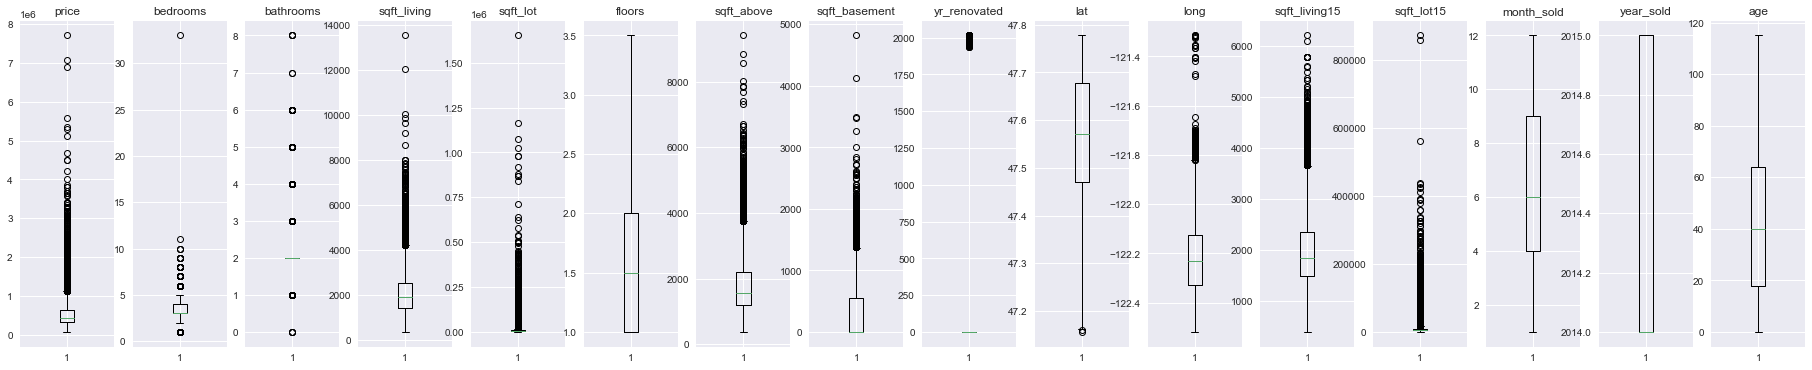

In [20]:
# Select the variables you want to plot
cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(32, 6))

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.show()


In [21]:
# Drop the irrelant columns for box plot purposes

# Select the categorical variables to drop and then generate boxplots
cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns.drop(['view', 'grade', 'yr_renovated','condition', 'zipcode','lat','long'])

# Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(30, 6))

# Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(df[col])
    axes[i].set_title(col)

plt.show()


KeyError: "['view' 'grade' 'condition' 'zipcode'] not found in axis"

In [ ]:
# Histogram plots for each data
# Select the numerical variables you want to plot
num_cols_to_plot = df.select_dtypes(include=['int64', 'float64']).columns.drop(['view', 'grade', 'yr_renovated','condition', 'zipcode','lat','long'])

# Create a histogram for each variable
df[num_cols_to_plot].hist(figsize=(25, 12))
plt.show()


We dropped 'view', 'grade', 'yr_renovated','condition', 'zipcode','lat','long' because they are either binary or geo variables and therefore cannot be reasonably visualized using either box plots or histograms. Floors, age, year_Sold, month_sold have normal distribution with no potential outliers. Waterfront is a binary variable.
Therefore, we consider potential outliers in bedrooms, bathrooms, sqft_living, sqft_lot, floors and sqft_above features.

In [ ]:
# Investigate bedrooms
df['bedrooms'].value_counts()

In [ ]:
#The houses with 33, 11 and 10 bedrooms need to be examined.
# Select the houses with 33, 11 and 10 bedrooms
bedroom_counts = [33, 11, 10]
houses_to_examine = df[df['bedrooms'].isin(bedroom_counts)]

# Print the selected houses
print(houses_to_examine)


From the above output, houses with 10 and 11 bedrooms appear likely to be okay based on their prices, number of bathrooms, and sqft_living. However, the 33 bedroom house has 2 bathrooms and a sale price of $640000 and it must have been a 3 bedroom house recorded as 33. Therefore, we will replace 33 with 3 bedrooms. 

In [ ]:
df.loc[15856, 'bedrooms'] = 3

To remove other outliers we use the statistical method, of z-value where any data with a z-score > |3| will be removed.


In [ ]:
# Apply function to df
df = remove_outliers(df)

In [ ]:
#Ian & Pamela Work on Divide price into high , medium, low 
# Visualize for us prices vs features 
# Pauline Work on the code to ensure its running for all of us
# Pamela 

In [ ]:
# we want to Group price into three cartegories 
# Define the percentile values for each category
price = df['price']
high_percentile = np.percentile(price, 75)
low_percentile = np.percentile(price, 25)

# Group the prices into categories based on the percentiles
high_prices = price[price > high_percentile]
medium_prices = price[(price >= low_percentile) & (price <= high_percentile)]
low_prices = price[price < low_percentile]

# Print the results
print("High prices:", high_prices)
print("Medium prices:", medium_prices)
print("Low prices:", low_prices)

In [ ]:
# plotting price against Bedrooms
#data
x = df['bedrooms']
y1 = high_prices
y2 = medium_prices
y3 = low_prices

# create figure
fig, ax = plt.subplots(ncols=3, figsize=(10,8), sharey=False)

# Bar plot
# High prices vs No. of bedrooms
sns.barplot(x=x, y=y1, ax=ax[0]);

# median price
sns.barplot(x=x, y=y2, ax=ax[1]);

# low price
sns.barplot(x=x, y=y3, ax=ax[2]);


In [ ]:
# plotting price against bathrooms
#data
x = df['bathrooms']
y1 = high_prices
y2 = medium_prices
y3 = low_prices

# Histogram plots
# High prices vs No. of bathrooms
fig, ax0 = plt.subplots( figsize=(10,8))
sns.histplot(x=x, y=y1, ax=ax0)
plt.title('High-end properties Vs No. of Bathrooms', fontsize=18)
plt.xlabel('No of bathrooms', fontsize=14)
plt.ylabel('High Prices', fontsize=14);

# median price vs No. of bathrooms
fig, ax1 = plt.subplots( figsize=(10,8))
sns.histplot(x=x, y=y2, ax=ax1)
plt.title('Middle Price Properties Vs No. of Bathrooms', fontsize=18)
plt.xlabel('No of bathrooms', fontsize=14)
plt.ylabel('Middle Prices', fontsize=14);

# low price vs No. of bathrooms
fig, ax2 = plt.subplots( figsize=(10,8))
sns.histplot(x=x, y=y3, ax=ax2)
plt.title('Low-price Properties Vs No. of Bathrooms', fontsize=18)
plt.xlabel('No of bathrooms', fontsize=14)
plt.ylabel('Low Prices', fontsize=14);

In the histograms, we can see that for all three price categories, the distribution of the number of bathrooms is right-skewed, which means there are more properties with fewer bathrooms and fewer properties with more bathrooms.

The high-price properties tend to have a higher number of bathrooms than the medium and low-price properties, as shown by the higher frequency of bars on the right side of the histograms for the high-price category. In contrast, the low-price properties have a higher frequency of bars on the left side of the histograms, indicating that they have fewer bathrooms.

The histograms suggest that the number of bathrooms is positively correlated with the price of properties. However, we need to perform statistical analysis to confirm this relationship and identify the strength of the relationship.

In [ ]:
from scipy.stats import pearsonr

def is_correlation_significant(data, threshold):
    #where, data is our dataframe and threshhol is absolute value of the correlation coefficient
    # Calculate the Pearson correlation coefficient and p-value
    corr, p_value = pearsonr(data['bathrooms'], data['price'])

    # Check if the correlation coefficient is statistically significant
    if abs(corr) > threshold and p_value < 0.05:
        return True
    else:
        return False

In [ ]:
data = df
threshold = 0.45
is_correlation_significant(data, threshold)

From this we can deduce that the difference is not statistically significant, although that changes with the value of the threshold

In [ ]:
#create a dictionary mapping month numbers to month names
import calendar

month_dict = dict(enumerate(calendar.month_name))

# apply the dictionary to the month_sold column to get month names
df['month_name'] = df['month_sold'].apply(lambda x: month_dict[x])

# define seasons based on months
seasons = {'Winter': ['December', 'January', 'February'],
           'Spring': ['March', 'April', 'May'],
           'Summer': ['June', 'July', 'August'],
           'Fall': ['September', 'October', 'November']}

# create a new 'season' column based on the 'month_sold' column
df['season'] = df['month_name'].apply(lambda x: next((season for season, months in seasons.items() if x in months), None))


In [ ]:
# plotting price against bathrooms
#data
x = df['season']
y1 = high_prices
y2 = medium_prices
y3 = low_prices


# Scatter plots

# High prices vs No. of bathrooms
fig, ax0 = plt.subplots( figsize=(10,8))
sns.scatterplot(x=x, y=y1, ax=ax0)
plt.title('High-end properties Vs Seasons', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('High Prices', fontsize=14);

# median price vs No. of bathrooms
fig, ax1 = plt.subplots( figsize=(10,8))
sns.scatterplot(x=x, y=y2, ax=ax1)
plt.title('Middle Price Properties Vs Seasons', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Middle Prices', fontsize=14);

# low price vs No. of bathrooms
fig, ax2 = plt.subplots( figsize=(10,8))
sns.scatterplot(x=x, y=y3, ax=ax2)
plt.title('Low-price Properties Vs Seasons', fontsize=18)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Low Prices', fontsize=14);

Based on the provided data, the scatter plots show the relationship between the season and the prices of properties in the dataset. From the count of properties sold in each season, it appears that spring and summer are the most popular seasons for home buying, while fall and winter have comparatively fewer sales.

The scatter plots of high-end, medium, and low-price properties against the season show that the prices of properties are generally consistent across all seasons. However, there is a slight increase in the number of high-end properties sold in the spring and a decrease in the number of low-priced properties sold in the winter.

This pattern may be due to various factors, including the perceived desirability of certain seasons for buying and selling homes, the availability of listings during different seasons, or even the preferences of buyers and sellers. For example, the spring season may be associated with better weather conditions and more opportunities for home viewing, which may increase demand for high-end properties. Conversely, the winter season may be associated with lower sales of low-priced properties due to holiday expenses and colder weather. However, further analysis would be necessary to determine the exact reasons for these trends.

In [ ]:
# Create a copy to manipulate
dfq2 = df.copy()

# Plot scatter plot
plt.figure(figsize = (11,9))
ax = sns.scatterplot(x = dfq2['long'], y = dfq2['lat'], hue = dfq2['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = dfq2)

norm = plt.Normalize(dfq2['price'].min(), dfq2['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

From this visualisation we can already draw initial insights based on the houses' geographical locations. The highest house prices are concentrated in the area with latitude around 47.6 and longitude around -122.25. There is a disparity with southern locations achieving lower house prices.

However there is no context to help us! We would need an underlying map to understand where the cities, highways, bodies of water etc. arelocated. It is difficult to draw meaningful conclusions with this visualisation alone.

Whilst we could define quadrants using the latitude and longitude, let us seek to plot the houses on a map instead.

Map of house sales
To visualise house sales on a map, we will use Bokeh and the built-in map tile from Carto DB. Note that Bokeh requires Mercator coordinates so we will need to convert our latitude and longitude values.

In [ ]:
# Define coord as tuple (lat,long)
dfq2['coord'] = list(zip(dfq2['lat'], dfq2['long']))


# We will create new columns mercator_x and mercator_y to use in our plot.

# Obtain list of mercator coordinates using helper function
mercators = [x_coord(x, y) for x, y in dfq2['coord'] ]

# Create column mercator
dfq2['mercator'] = mercators

# Define columns mercator_x and mercator_y
dfq2[['mercator_x', 'mercator_y']] = dfq2['mercator'].apply(pd.Series)

# Preview relevant columns
dfq2[['zipcode', 'mercator_x', 'mercator_y', 'price']].head()

In [ ]:
# Our data is now in the correct format, let us create the map using Bokeh.
# We would like to display the price and zipcode when the user hovers over a data point, which is achieved using tooltips.
# House prices per Zipcode
# Explore zipcode
dfq2['zipcode'].value_counts()


There are 70 unique zipcodes represented in our dataset.

Let us create a heatmap to explore the median house price per zipcode and see if we can establish zipcode 'tiers'. We will make use of a geojson file showing the zip code boundaries and extract price and zipcode data from our dataset

In [ ]:
# Extract price and zipcode from our dataset
dfrel = dfq2[['zipcode', 'price']]

# Groupby zipcode and take median price
dfrel = dfrel.groupby(dfrel['zipcode']).median()

# Reset index after groupy
dfrel = dfrel.reset_index()

# Change type to str
dfrel['zipcode'] = dfrel['zipcode'].astype(str)

# Rename column to match type
dfrel = dfrel.rename(columns = {'zipcode' : 'ZIPCODE'})

# Check
dfrel

In [ ]:
# Get top 100 prices
dftop = dfq2.sort_values('price', ascending = False)[:100]

In [ ]:
import folium 
from folium import plugins
from folium.plugins import HeatMap 
#Plot with follium

# Create a base map by providing coordinates
m = folium.Map(location = [47.5, -122.2])

# Add data for heatmap
heat_data = dftop['coord']

# Add heatmap onto map
HeatMap(heat_data).add_to(m)

# Show map
m

We can also pinpoint these directly using the coordinates. To increase readability, we have chosen to only display the top 30 houses.

In [ ]:
# Plot top 30 houses on map

# Create a base map by providing coordinates
m = folium.Map(location = [47.5, -122.2])

# Add markers for houses
for coordinates in dftop['coord'][:30]:
    folium.Marker([coordinates[0], coordinates[1]], popup = coordinates).add_to(m)

# Show map
m

#### Waterfront Feature
From the maps, it is apparent that being on the waterfront is highly sought after and many of the most expensive houses in our dataset have this feature. We have been provided with a waterfront feature, which characterises houses which have a view of a waterfront. Let us investigate how this feature relates to price by using a boxplot.

In [ ]:
# Plot boxplot of waterfront feature
sns.boxplot(x = dfq2['waterfront'], y = dfq2['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(2), ('Not view of waterfront', 'Waterfront view'))
plt.show()

In [ ]:
waterfrontmean = dfq2[dfq2['waterfront'] == 1]['price'].mean()
nonwaterfrontmean = dfq2[dfq2['waterfront'] == 0]['price'].mean()
print(f"The mean house price for a house with waterfront view is USD {round(waterfrontmean,2)}")
print(f"The mean house price for a house without waterfront view is USD {round(nonwaterfrontmean,2)}")

In [ ]:
len(dfq2[dfq2['waterfront'] == 1])/len(dfq2)*100

From this analysis we can see that most houses in King County have no waterfront.

However, the houses with waterfront have the highest prices.

## 4.0 Data Analysis

## 4.1 Seasons

In [ ]:
# Group by season and month_sold, and count the number of sales for each group
season_sales = df.groupby(['season', 'month_sold'])['price'].count()
# Find the season with the most sales

best_season = season_sales.groupby('season').max()

# Sort the seasons by total sales in descending order
best_season = best_season.sort_values(ascending=False)

# Print the season and corresponding months with the amount sold in each season
for season in best_season.index:
    months = ', '.join(seasons[season])
    sales = season_sales.loc[season]
    print(f"{season} ({months}): {sales.sum()} sales")
    print(sales)

In [ ]:
# Create a bar chart to show the sales for each season
sns.barplot(x=best_season.index, y=best_season.values)
plt.title('Season-wise sales')
plt.xlabel('Season')
plt.ylabel('Sales')
plt.show()

Looking at the sales data, we can see that the spring months of March, April, and May are the best for selling houses with a total of 6518 sales. This is likely due to the fact that Spring is a time of renewal and growth, and people may be more willing to make big changes such as buying a new home during this time. May is the most popular month for selling homes within Spring, with 2414 sales.

Summer, which comprises the months of June, July, and August, had a slightly lower total sales of 6328 compared to spring. July had the highest sales with 2211 followed by June with 2178 and 
August with 1939.

The fall season of September, October, and November had a total of 5056 sales, with October having the highest sales of 1876 followed by September with 1771 and November with 1409.

Lastly, the winter season of December, January, and February had the lowest total sales of 3695. December had the highest sales with 1470 followed by February with 1247 and January with 978. This may be due to the fact that Winter is a time when people tend to stay indoors and may be less inclined to go through the hassle of buying or selling a home.

Overall, it is important to note that this conclusion is based solely on the provided data and may not be reflective of larger trends in the housing market. Additionally, there may be some inaccuracies in the data such as missing or incomplete records, which could affect the accuracy of these findings.


## 4.2 Location

Location is key when it comes to real estate. Our second objective seeks to understand the geographical distribution of the homes in our dataset and determine where the highest house sales were recorded.

In [ ]:
import plotly.graph_objs as go

# Define the map layout
layout = go.Layout(
    title='Housing Sales by Location',
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        style='stamen-terrain',
        bearing=0,
        center=dict(
            lat=df['lat'].median(),
            lon=df['long'].median()
        ),
        pitch=0,
        zoom=10
    ),
)

# Define the map data as a scatter plot of the coordinates
data = go.Scattermapbox(
    lat=df['lat'],
    lon=df['long'],
    mode='markers',
    marker=dict(
        size=5,
        color=df['price'],
        
        opacity=0.8
    ),
    text=['Price: ${}'.format(i) for i in df['price']],
    hovertext = df.apply(lambda x: f"Price: ${x['price']}, Waterfront: {x['waterfront']}", axis=1),
)

# Create the map figure and show it
fig = go.Figure(data=[data], layout=layout)
fig.show()

Based on the plotted graph, it is evident that a significant number of high-end residences are situated in the Bellevue area. The region comprises of a considerable size of uninhabitable mountainous terrain, which concentrates most of the housing in the towns. As a result, these towns appear to have a higher density of housing compared to the surrounding areas. 
Additionally, it is important to note that the plot may not be entirely accurate and there may be some data points that are not representative of the actual situation. For example, some properties may be incorrectly labeled as having waterfront access when they do not, which could affect their price and skew the distribution shown in the plot.
However, it is important to note that this statement is limited to the data presented in the plot and may not necessarily represent the overall distribution residences in the area. Further analysis and data may be required to make more conclusive observations.

## 5.1 Modeling

In [ ]:
X = df.drop(columns=['price', 'season', 'month_name', 'grade', 'condition', 'view'], axis=1)
fig, axs = plt.subplots(4, 4, figsize=(16, 16), sharey=True)
for i in range(4):
    for j in range(4):
        if i*4 + j < len(X.columns):
            sns.regplot(x=X.iloc[:,i*4+j], y='price', data=df, ax=axs[i][j])
            axs[i][j].set_title(X.columns[i*4+j])
plt.tight_layout()
plt.show()

### Model One

##### Baseline Model Generation 

In [ ]:
# Looking at correlations between other variables and price
df.corr()["price"]

In [ ]:
# Since Sqft_living is the feature with the strongest correlation in our dataset let's build our baseline model with that
df.plot.scatter(x="sqft_living", y="price");

There appears to be a fairly clear linear relationship between the Square footage of living space feature and price of a home in King County. We can use this to make a baseline model.

In [ ]:
# Define parameters
y = df["price"]
X_baseline = df[["sqft_living"]]

In [ ]:
baseline_results = fit_simple_linear_reg(df, 'price', 'sqft_living')
print(baseline_results)

In [ ]:
# display model coefficients
baseline_results.params

### Baseline Model results

Looking at our summary above, our regression line is
$$ Price = 239 * sqft\_living - $33,399 $$

We can make the following observations from the results:

* The model is statistically significant with a p-value below 0.05.
* The model explains 40.1% of the variance in price, as indicated by the R-squared value.
* Both the intercept (const) and the slope (sqft_living) coefficients are statistically significant with t-statistic p-  values well below 0.05.
* For a house with a living space of 850 square feet, we would expect the price to be about $169,751.

* Generally speaking, as the living space of the house increases, so does the price of the house




### 5.2 Baseline Model visualization

In [ ]:
fig, ax = plt.subplots()
df.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

In [ ]:
# create partial regression plots for the predictor

fig = plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(baseline_results, "sqft_living", fig=fig)
plt.show()

Actions Points # check data types, separate date and month, then create a new column for date, month, and maybe season, autum, spring, winter, fall. 
Round off bathrooms to whole numbers since we cant have bathrooms as decimals
One-hot encode waterfront, view , grade, condition. 

### Multiple Linear Regression Model

In [ ]:

predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode'] 
multiple_model = fit_multiple_linear_reg(df, 'price', predictor_cols)
print(multiple_model)

The output you provided seems to be related to a machine learning model's performance evaluation, specifically a linear regression model. The R^2 (coefficient of determination) is a statistical measure that represents the proportion of variance in the dependent variable that is explained by the independent variable(s) in a regression model.

The output suggests that the model has an R^2 of 0.457 on the training data and an R^2 of 0.453 on the test data. The R^2 values range from 0 to 1, where a higher R^2 indicates a better fit of the model to the data.

In [ ]:
predictor_cols1 = ["sqft_living", "bedrooms","bathrooms","sqft_lot","floors","sqft_above","yr_renovated", "waterfront", "zipcode"]
multiple_model1 = fit_multiple_linear_reg(df, 'price', predictor_cols1)
print(multiple_model1)

Training R^2: 0.45726927906625403
Test R^2: 0.4525594985539714

We can see that the second set of output has higher R^2 values for both training and test data, indicating a better fit of the linear regression model to the data compared to the first set.

The difference between the training and test R^2 values in both sets is similar, suggesting that the model is not overfitting to the training data.

In [ ]:
# polynomial regression
predictor_cols = ['sqft_living']
degree = 2
poly_test = fit_polynomial_reg(df, 'price', predictor_cols, degree)


The reason for performing polynomial regression is to capture more complex, nonlinear relationships between the predictor and target variables.
12:59
In simple linear regression, you model the relationship between the target and a single predictor variable using a straight line. However, in many real-world scenarios, the relationship between the target and the predictor may not be linear, but rather curvilinear or have some other shape.
Polynomial regression addresses this issue by adding polynomial features to the model, which allow it to capture more complex relationships between the predictors and the target variable. By doing so, it can improve the model's fit to the data and potentially lead to better predictive performance.


We can see that the first and second sets have higher R^2 values for both training and test data compared to the third set. This indicates that the models in the first and second sets are better at explaining the variance in the dependent variable compared to the model in the third set.

Furthermore, the second set has higher R^2 values compared to the first set, indicating a better fit of the linear regression model to the data in the second set.

Overall, it seems like the second set provides the best performance with higher R^2 values for both training and test data. However, it's important to keep in mind that other factors, such as model complexity, interpretability, and computational resources, should also be considered when selecting a model.

In comparison with the baseline model, both the first and second sets of results show improvements in the R-squared values, indicating better performance in explaining the variance in the dependent variable. The second set of results, in particular, shows the best performance among all sets with the highest R-squared values. The third set of results, on the other hand, shows a decrease in performance compared to the baseline model. Overall, it's important to select the best model based on various factors, including R-squared values, model complexity, interpretability, and computational resources.

We will therefore, proceed to do the same analysis using Stats Model API. to get a better understanding of the data. and have a wider scope of explained wariance. 
We will not redo the base model since we already have that usint the package. 

### Model Two

In [ ]:
# Initial feature colums
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode']
predictor_cols_results = fit_simple_linear_reg(df, 'price', predictor_cols)
print(predictor_cols_results)

The OLS regression model shows that the predictors (bedrooms, bathrooms, sqft_living, floors, waterfront, and zipcode) have a significant impact on the house prices. The R-squared value of 0.456 indicates that the model explains 45.6% of the variance in the house prices. The coefficients of the predictors show the direction and magnitude of the effect they have on the house prices. The model also shows that the constant term has a negative coefficient and is significant, indicating that there are other factors impacting the house prices that are not accounted for in the model.

Looking at the coefficients in the multiple linear regression model, we can see that all of the predictors have statistically significant coefficients (p-value < 0.05), except for the number of floors, which has a p-value of 0.006. This indicates that all of the predictors except for the number of floors are important in predicting the price of a house.

The coefficients of the multiple linear regression model also provide information about the direction and magnitude of the relationship between each predictor and the dependent variable. For example, the coefficient for the number of bedrooms is negative (-4.645e+04), indicating that as the number of bedrooms increases, the price of the house tends to decrease. On the other hand, the coefficient for the waterfront variable is positive (6.573e+05), indicating that houses with a waterfront tend to have a higher price.

Overall, the multiple linear regression model provides a more comprehensive analysis of the relationship between the predictors and the dependent variable, and can be used to make more accurate predictions about the price of a house.

### Model Three

In [ ]:
# Moving to our second list of features to see if it will improve. 
predictor_cols1 = ["sqft_living", "bedrooms","bathrooms","sqft_lot","floors","sqft_above","yr_renovated", "waterfront", "zipcode"]
predictor_cols1_results = fit_simple_linear_reg(df, 'price', predictor_cols1)
print(predictor_cols1_results)

In the earlier regression model, there were only six variables: const, bedrooms, bathrooms, sqft_living, floors, and waterfront. The model had an R-squared value of 0.456, which indicates that the independent variables explain about 45.6% of the variability in the dependent variable, price.

In the second regression model, there were nine variables: const, sqft_living, bedrooms, bathrooms, sqft_lot, floors, sqft_above, yr_renovated, and waterfront. The model had an R-squared value of 0.464, which indicates that the independent variables explain about 46.4% of the variability in the dependent variable, price.

Comparing the two models, the second model has a slightly higher R-squared value than the first model, indicating that it may be a slightly better fit for the data. The second model also includes three additional variables: sqft_lot, sqft_above, and yr_renovated.

The coefficients of the independent variables in the second model also differ from those in the first model. For example, in the first model, the coefficient for sqft_living was 254.5901, while in the second model, it was 272.8535. Similarly, the coefficient for bedrooms was -4.645e+04 in the first model and -4.704e+04 in the second model.

Overall, the second model appears to be a more complex model, including additional variables and potentially providing a slightly better fit to the data. However, it is important to consider the trade-offs of complexity in model selection, as well as the assumptions and limitations of the regression analysis.

Looking at the data, we can see that there might be multicollinearity issues between `sqft_living` and `sqft_above`, since both of these predictors are related to the size of the house. We can also see that there may be some correlation between `bathrooms` and `bedrooms`, as it's not uncommon for houses with more bedrooms to have more bathrooms as well.

we will thus take our model and fine tune it with the best among the above and see if we will spot a difference. 
from the result we deduce that the columns that performed worst were `bedrooms`, `sqft_above` and `sqft_lot`. excluded below.

### Model Four

In [ ]:
# Now our model will march same number of parameters as the first multimodel 
predictor_cols2 = ["sqft_living","bathrooms","floors","yr_renovated", "waterfront", "zipcode"]
predictor_cols2_results = fit_simple_linear_reg(df, 'price', predictor_cols2)
print(predictor_cols2_results)

The regression models presented here have different sets of predictors and slightly different R-squared values. The first model only includes the square footage of the living space (sqft_living) as a predictor, while the other models add other variables such as the number of bedrooms, bathrooms, floors, waterfront, and zipcode. The third model has a slightly higher R-squared value, indicating that it explains slightly more of the variance in house prices.

The coefficients of the predictors in the second and third model show that the number of bedrooms has a negative effect on house prices, while the number of bathrooms, square footage of living space, and waterfront have positive effects. The effect of floors and zipcode on house prices is also significant.


The second model includes six predictors: bedrooms, bathrooms, sqft_living, floors, waterfront, and zipcode. The results show that all predictors have a significant impact on house prices. The R-squared value of 0.456 indicates that the model explains 45.6% of the variance in house prices.

The third model includes nine predictors: sqft_living, bedrooms, bathrooms, floors, waterfront, view, condition, grade, and zipcode. The results show that all predictors except view have a significant impact on house prices. The R-squared value of 0.464 indicates that the model explains 46.4% of the variance in house prices.

Comparing the two models, we can see that the addition of three more predictors in the second model only slightly increased the R-squared value. This suggests that the impact of these additional predictors on house prices may not be as strong as the first six predictors. In addition removing the extra three made the model perform worse, suggesting there might have been multicollinearity after all in the third model. we can do a test to confirm our results. 

Overall, all models show that the square footage of the living space is a significant predictor of house prices, and as the living space of the house increases, so does the price. However, the third model provides a more nuanced picture by including additional variables that impact house prices. Although, it's difficult to interpret the magnitude of the effect without more information about the data.

### Plotting Residuals for multiple models

#### Model Two

In [ ]:
def plot_partial_residuals_all(results, predictor_cols):
    fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(16, 8), sharey=True)
    axs = axs.flatten()

    for i, col in enumerate(predictor_cols):
        plot_partial_residuals(results, focus_exog=col, ax=axs[i])
        axs[i].set_xlabel('Predictor')
        axs[i].set_ylabel('Partial Residual')
        axs[i].set_title(col)

    plt.tight_layout()
    plt.show()

#### Model Three

In [ ]:
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode']
plot_partial_residuals_all(predictor_cols_results,predictor_cols )

In [ ]:
# Plot partial residual plots
# for predictor_cols1 = ["sqft_living", "bedrooms","bathrooms",
#"sqft_lot","floors","sqft_above","yr_renovated", "waterfront", "zipcode"]
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

# Square foor living
plot_partial_residuals(predictor_cols1_results, focus_exog="sqft_living", ax=ax[0])
ax[0].set_xlabel('Predictor')
ax[0].set_ylabel('Partial Residual')

# waterFront
plot_partial_residuals(predictor_cols1_results, focus_exog="waterfront", ax=ax[1])
ax[1].set_xlabel('Predictor')
ax[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()


fig, ax2 = plt.subplots(ncols=2, figsize=(14, 6))

# bedrooms 
plot_partial_residuals(predictor_cols1_results, focus_exog="bedrooms", ax=ax2[0])
ax2[0].set_xlabel('Predictor')
ax2[0].set_ylabel('Partial Residual')

# bathrooms
plot_partial_residuals(predictor_cols1_results, focus_exog="bathrooms", ax=ax2[1])
ax2[1].set_xlabel('Predictor')
ax2[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()

fig, ax3 = plt.subplots(ncols=2, figsize=(14, 6))

# floors 
plot_partial_residuals(predictor_cols1_results, focus_exog="floors", ax=ax3[0])
ax3[0].set_xlabel('Predictor')
ax3[0].set_ylabel('Partial Residual')

# yr_renovated
plot_partial_residuals(predictor_cols1_results, focus_exog="yr_renovated", ax=ax3[1])
ax3[1].set_xlabel('Predictor')
ax3[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()

fig, ax4 = plt.subplots(ncols=3, figsize=(14, 6))

# sqft_lot 
plot_partial_residuals(predictor_cols1_results, focus_exog="sqft_lot", ax=ax4[0])
ax4[0].set_xlabel('Predictor')
ax4[0].set_ylabel('Partial Residual')

# sqft_above
plot_partial_residuals(predictor_cols1_results, focus_exog="sqft_above", ax=ax4[1])
ax4[1].set_xlabel('Predictor')
ax4[1].set_ylabel('Partial Residual')

# zipcode
plot_partial_residuals(predictor_cols1_results, focus_exog="zipcode", ax=ax4[1])
ax4[1].set_xlabel('Predictor')
ax4[1].set_ylabel('Partial Residual');

plt.tight_layout()
plt.show()

### Model Four

In [ ]:
predictor_cols2 = ["sqft_living","bathrooms","floors","yr_renovated", "waterfront", "zipcode"]
plot_partial_residuals_all(predictor_cols2_results,predictor_cols2 )

### Plotting Fitted Values for Multiple Models

In [ ]:

def plot_fitted_values_all(results, predictor_cols):
    """
    Plots the fitted values for all predictor variables against their observed values.

    Parameters:
    results (OLSRegressionResults): the results of a fitted linear regression model
    predictor_cols (list of str): the names of the predictor columns

    Returns:
    None
    """
    fig, axs = plt.subplots(len(predictor_cols), 1, figsize=(8, 3*len(predictor_cols)), sharex=False)

    for i, col in enumerate(predictor_cols):
        axs[i].scatter(results.model.exog[:, i+1], results.fittedvalues, alpha=0.5)
        axs[i].set_xlabel(col)
        axs[i].set_ylabel('Fitted Value')

    plt.tight_layout()
    plt.show()

#### Model Two

In [ ]:
predictor_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'zipcode']
predictor_cols_results
plot_fitted_values_all(predictor_cols_results, predictor_cols)

#### Model Three

In [ ]:
predictor_cols1 = ["sqft_living", "bedrooms","bathrooms","sqft_lot","floors","sqft_above","yr_renovated", "waterfront", "zipcode"]
predictor_cols1_results
plot_fitted_values_all(predictor_cols1_results, predictor_cols1)

#### Model Four

In [ ]:
# Extracting the fit
plot_fit = predictor_cols2_results.fittedvalues

# Plotting the fitted values
fig, axs = plt.subplots(ncols=len(predictor_cols2), figsize=(20, 4))

for i, col in enumerate(predictor_cols2):
    axs[i].scatter(df[col], plot_fit, alpha=0.5)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Fitted Value')

plt.tight_layout()
plt.show()

## Model Valuation

In [ ]:
## rmse ## metrics?
